In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
credit_card_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
credit_card_data.columns = credit_card_data.columns.str.lower()
credit_card_data.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [7]:
credit_card_data.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
legit = credit_card_data[credit_card_data['class'] == 0]
fraud = credit_card_data[credit_card_data['class'] == 1]

In [9]:
legit.shape

(284315, 31)

In [10]:
fraud.shape

(492, 31)

In [11]:
fraud.amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: amount, dtype: float64

In [12]:
legit.amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: amount, dtype: float64

In [13]:
credit_card_data.groupby('class').mean()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
legit_sample = legit.sample(n = 492)

In [15]:
new_data = pd.concat([legit_sample, fraud], axis = 0)
new_data.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
224973,144045.0,2.030403,-0.985295,-0.770600,-0.840319,-1.017245,-1.008367,-0.439019,-0.278001,-0.293184,...,-0.849287,-2.041850,0.597218,-0.050889,-0.955582,0.641886,-0.089446,-0.041229,74.50,0
180610,124617.0,-0.646722,-0.101628,0.221515,-2.327025,-1.613404,-0.031514,-1.192682,0.885148,-2.332611,...,-0.142760,-0.264947,0.290186,-0.522972,-1.296929,-0.540397,-0.072596,0.057856,53.98,0
5835,6318.0,-1.504963,-0.169282,-1.558463,0.227684,3.348552,2.798450,0.286382,0.595473,1.051651,...,-0.170593,0.063076,0.135812,0.962040,-0.453604,-0.424620,0.632914,0.787734,150.00,0
275858,166759.0,0.044591,0.967741,-0.678670,-1.289275,1.532140,-0.934898,1.746031,-0.454177,-0.503957,...,0.243665,1.023636,-0.261800,0.753403,-0.373095,0.010169,0.226539,0.041609,0.77,0
50535,44531.0,1.315333,-1.592533,1.270936,-1.019207,-1.798024,1.102199,-1.806843,0.400203,-0.787727,...,-0.388397,-0.277332,0.011250,-0.265706,0.325256,-0.183350,0.111311,0.017188,32.00,0


In [16]:
new_data['class'].value_counts()

class
0    492
1    492
Name: count, dtype: int64

In [17]:
X = new_data.drop(columns = 'class', axis = 1)
y = new_data['class']

In [18]:
print(X.shape)
print(X)

(984, 30)
            time        v1        v2        v3        v4        v5        v6  \
224973  144045.0  2.030403 -0.985295 -0.770600 -0.840319 -1.017245 -1.008367   
180610  124617.0 -0.646722 -0.101628  0.221515 -2.327025 -1.613404 -0.031514   
5835      6318.0 -1.504963 -0.169282 -1.558463  0.227684  3.348552  2.798450   
275858  166759.0  0.044591  0.967741 -0.678670 -1.289275  1.532140 -0.934898   
50535    44531.0  1.315333 -1.592533  1.270936 -1.019207 -1.798024  1.102199   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              v7        v8   

In [19]:
print(y.shape)
print(y)

(984,)
224973    0
180610    0
5835      0
275858    0
50535     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: class, Length: 984, dtype: int64


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y, test_size = 0.2)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(787, 30) (197, 30) (787,) (197,)


In [22]:
print(X, X_train.shape, X_test.shape)

            time        v1        v2        v3        v4        v5        v6  \
224973  144045.0  2.030403 -0.985295 -0.770600 -0.840319 -1.017245 -1.008367   
180610  124617.0 -0.646722 -0.101628  0.221515 -2.327025 -1.613404 -0.031514   
5835      6318.0 -1.504963 -0.169282 -1.558463  0.227684  3.348552  2.798450   
275858  166759.0  0.044591  0.967741 -0.678670 -1.289275  1.532140 -0.934898   
50535    44531.0  1.315333 -1.592533  1.270936 -1.019207 -1.798024  1.102199   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              v7        v8        v9  .

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
x_train_pred = model.predict(X_train)
x_pred_accuracy = accuracy_score(x_train_pred, y_train)

In [26]:
print(f'Accuracy on training data : {x_pred_accuracy}')

Accuracy on training data : 0.9428208386277002


In [27]:
y_train_pred = model.predict(X_test)
y_pred_accuracy = accuracy_score(y_train_pred, y_test)

In [28]:
print(f'Accuracy on test data : {y_pred_accuracy}')

Accuracy on test data : 0.9695431472081218


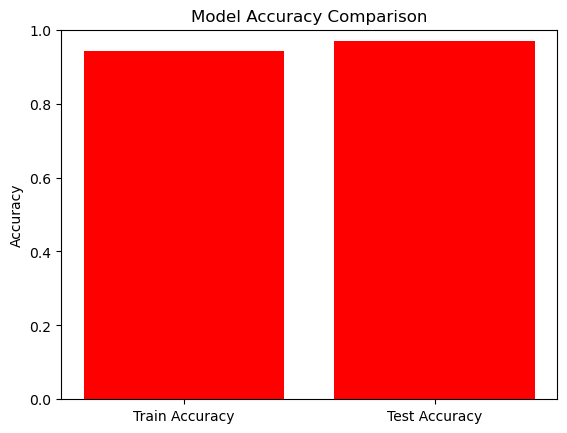

In [29]:
import matplotlib.pyplot as plt

labels = ['Train Accuracy', 'Test Accuracy']
values = [x_pred_accuracy, y_pred_accuracy]

plt.bar(labels, values, color = 'r')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

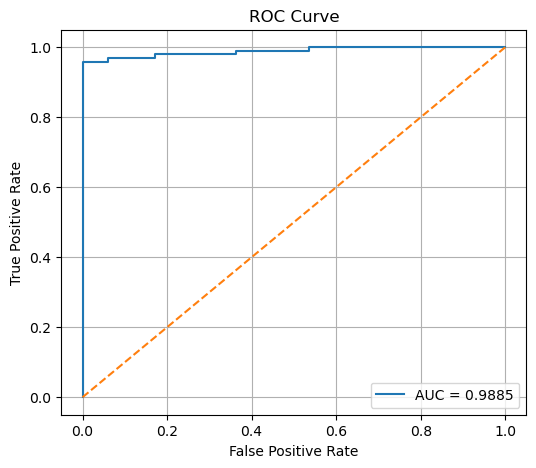

In [30]:
from sklearn.metrics import roc_curve, auc

# probability scores for positive class
y_test_prob = model.predict_proba(X_test)[:,1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# AUC Score
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6,5))
plt.plot(fpr, tpr, label = f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], linestyle = '--')  #random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

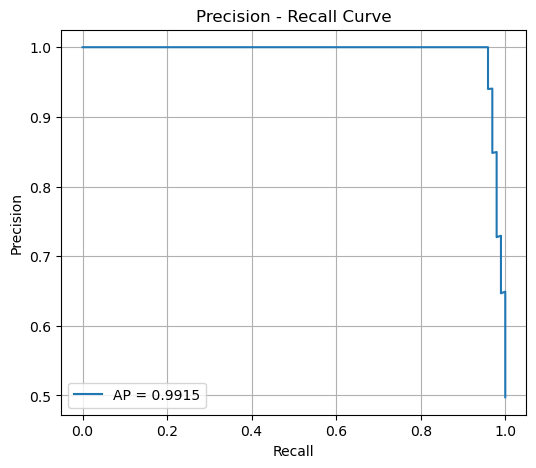

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, pr_thresholds = precision_recall_curve(y_test, y_test_prob)
ap_score = average_precision_score(y_test, y_test_prob)

plt.figure(figsize = (6,5))
plt.plot(recall, precision, label = f'AP = {ap_score:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall Curve')
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

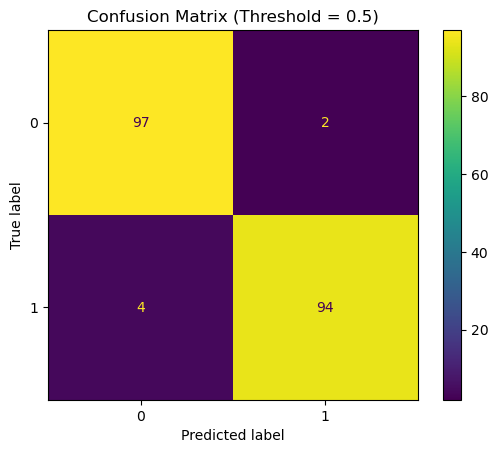

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_05 = (y_test_prob >= 0.5).astype(int)

cm_05 = confusion_matrix(y_test, y_pred_05)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_05)
disp.plot()
plt.title('Confusion Matrix (Threshold = 0.5)')
plt.show()